## THERE ARE TWO TYPES OF SAMPLING 
`
       * UPSAMPLING [INCREASING THE NUMBER OF MINORITY PART]
       * UPSAMPLING [DECREASING THE NUMBER OF MAJORITY PART]
     `

In [411]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [413]:
from imblearn.over_sampling import RandomOverSampler

In [415]:
data = {
    'product' : ['no'] * 95 + ['yes'] * 5
}
df = pd.DataFrame(data)
df
df['product']

0      no
1      no
2      no
3      no
4      no
     ... 
95    yes
96    yes
97    yes
98    yes
99    yes
Name: product, Length: 100, dtype: object

In [417]:
df.drop('product', axis = 1)

""
0
1
2
3
4
...
95
96
97
98


<Axes: xlabel='product', ylabel='count'>

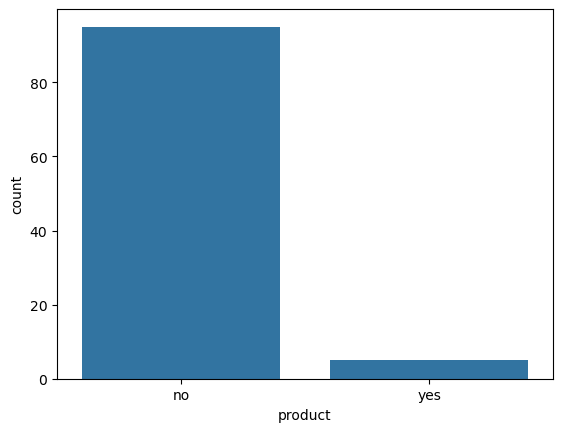

In [418]:
sns.countplot(x = 'product', data = data)

# UPSAMPLING

In [421]:
#upsampling
ros = RandomOverSampler(random_state = 323)  # random seed [ randomly selected numbers by without changing the period ]
x = df.drop('product', axis = 1)
y = df['product']
x_resampled , y_resampled = ros.fit_resample(x,y)     

#new table on dataframe
df_resample = pd.DataFrame({'product' : y_resampled})


In [422]:
#check the new balanced data
df_resample['product'].value_counts()

product
no     95
yes    95
Name: count, dtype: int64

<Axes: xlabel='product', ylabel='count'>

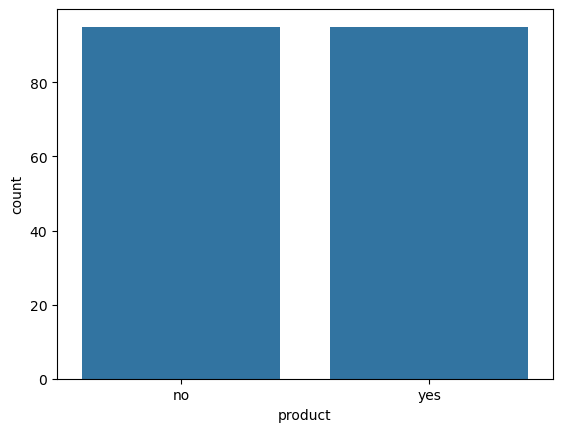

In [424]:
#count plot
sns.countplot(x = 'product', data = df_resample)

#### UPSAMPLING ANOTHER EXAMPLE 

In [428]:
data = pd.read_csv('imbalanced.csv')
data

,Age,Gender,Class
0,25,Male,No
1,34,Female,No
2,45,Male,No
3,23,Female,No
4,35,Male,No
5,44,Female,No
6,25,Male,No
7,36,Female,No
8,22,Male,No
9,45,Female,Yes


<Axes: xlabel='Class', ylabel='count'>

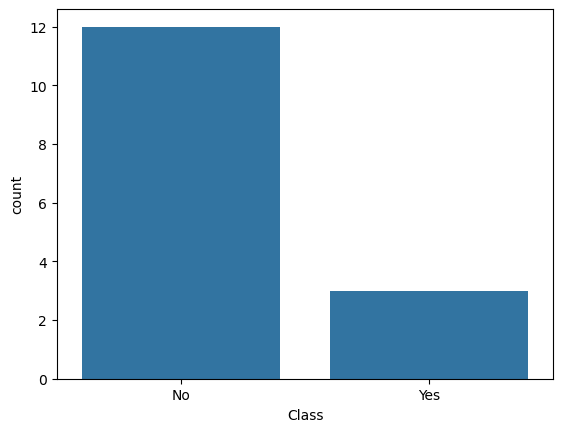

In [429]:
sns.countplot(x= 'Class', data= data)

In [430]:
data['Class']

0      No
1      No
2      No
3      No
4      No
5      No
6      No
7      No
8      No
9     Yes
10    Yes
11    Yes
12     No
13     No
14     No
Name: Class, dtype: object

In [432]:
#from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state = 123)
x = data.drop('Class', axis = 1)
y = data['Class']
x_sampling , y_sampling = ros.fit_resample(x,y)

In [433]:
y_sampling.value_counts()

Class
No     12
Yes    12
Name: count, dtype: int64

In [435]:
new_data = pd.DataFrame({'new_class' : y_sampling})

In [436]:
new_data

,new_class
0,No
1,No
2,No
3,No
4,No
5,No
6,No
7,No
8,No
9,Yes


<Axes: xlabel='new_class', ylabel='count'>

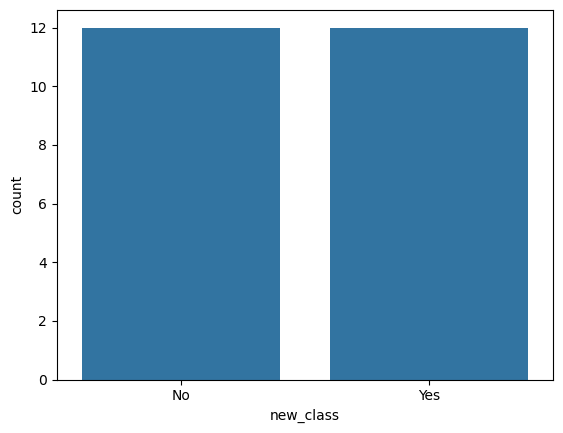

In [437]:
sns.countplot(x= 'new_class', data = new_data)

# DOWN SAMPLING

we can use downsampling by fit_resapmle by random unser sampler here we use resmple method by sklearn 

In [442]:
from sklearn.utils import resample
data = {
    'email' : ['email1','email2','email3','email4', 'email5', 'email6'],
    'label' : ['spam','notspam','spam','spam','notspam','spam']
}
df = pd.DataFrame(data)
df

,email,label
0,email1,spam
1,email2,notspam
2,email3,spam
3,email4,spam
4,email5,notspam
5,email6,spam


<Axes: xlabel='label', ylabel='count'>

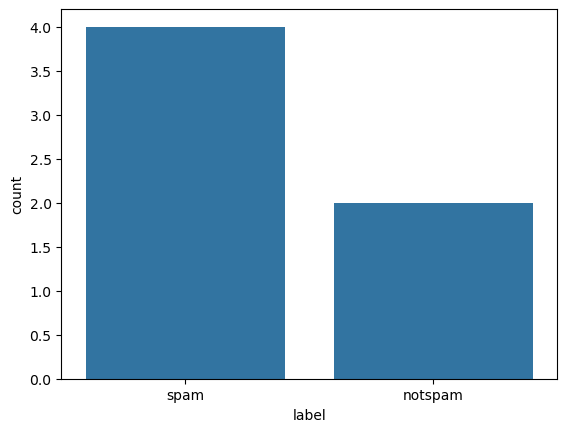

In [444]:
sns.countplot(x = 'label', data = df)

In [447]:
# seprate majority and minority 
major = df[df['label'] == 'spam']
minor = df[df['label'] == 'notspam']

In [448]:
#down sampling the majority 
df_majority_downsampling = resample(major,
                                   replace = False,
                                   n_samples = len(minor),
                                   random_state = 42)


In [449]:
df_majority_downsampling

,email,label
2,email3,spam
5,email6,spam


In [451]:
#combine minority class with dowsampling majority class
df_balanced = pd.concat([df_majority_downsampling,minor])
df_balanced

,email,label
2,email3,spam
5,email6,spam
1,email2,notspam
4,email5,notspam


<Axes: xlabel='label', ylabel='count'>

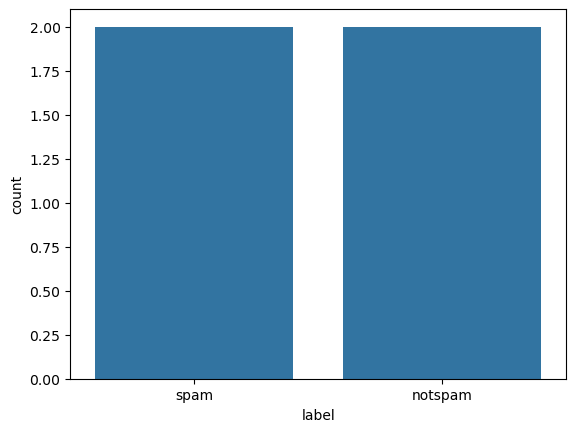

In [452]:
sns.countplot(x = 'label', data = df_balanced)

#### ANOTHER EXAMPLE  by [fit_resample()]

In [455]:
data1 = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Feature2': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    'Class': ['Class_0'] * 10 + ['Class_1'] * 5
}
df = pd.DataFrame(data1)

In [456]:
df

,Feature1,Feature2,Class
0,1,5,Class_0
1,2,6,Class_0
2,3,7,Class_0
3,4,8,Class_0
4,5,9,Class_0
5,6,10,Class_0
6,7,11,Class_0
7,8,12,Class_0
8,9,13,Class_0
9,10,14,Class_0


In [457]:
df['Class'].value_counts()

Class
Class_0    10
Class_1     5
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

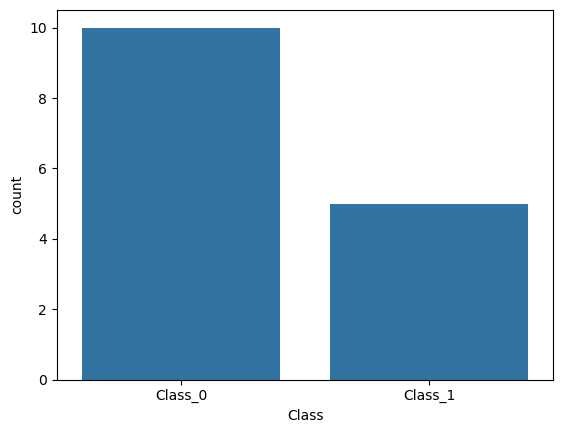

In [458]:
sns.countplot(x = 'Class', data = df)

In [459]:
from imblearn.under_sampling import RandomUnderSampler

In [460]:
x = df.drop('Class',axis = 1)
y = df['Class']

In [461]:
rus = RandomUnderSampler(random_state = 42)
x_re , y_re = rus.fit_resample(x,y)
y_re

8     Class_0
1     Class_0
5     Class_0
0     Class_0
7     Class_0
10    Class_1
11    Class_1
12    Class_1
13    Class_1
14    Class_1
Name: Class, dtype: object

In [463]:
df['new_class'] = y_re
df

,Feature1,Feature2,Class,new_class
0,1,5,Class_0,Class_0
1,2,6,Class_0,Class_0
2,3,7,Class_0,NaN
3,4,8,Class_0,NaN
4,5,9,Class_0,NaN
5,6,10,Class_0,Class_0
6,7,11,Class_0,NaN
7,8,12,Class_0,Class_0
8,9,13,Class_0,Class_0
9,10,14,Class_0,NaN


In [466]:
df_resamples = pd.DataFrame({'new_class': y_re})
df_resamples

,new_class
8,Class_0
1,Class_0
5,Class_0
0,Class_0
7,Class_0
10,Class_1
11,Class_1
12,Class_1
13,Class_1
14,Class_1


<Axes: xlabel='new_class', ylabel='count'>

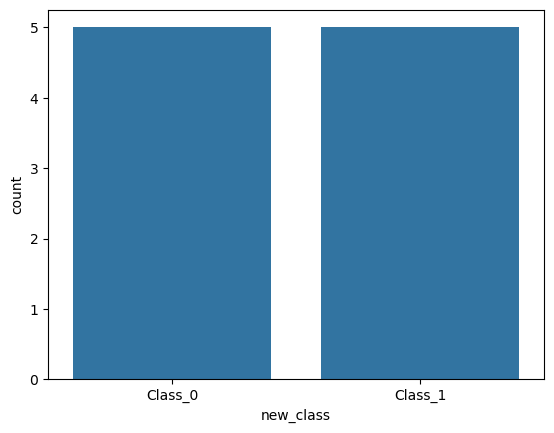

In [468]:
sns.countplot(x = 'new_class', data = df_resamples )

In [470]:
df_resamples['new_class'].value_counts()

new_class
Class_0    5
Class_1    5
Name: count, dtype: int64

# SMOTE [ SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE ]

In [483]:
df = pd.read_csv('diabetes1.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,30,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,0
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,36.0,0.232,54,1


In [485]:
df['Outcome'].value_counts()

Outcome
0    14
1     6
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

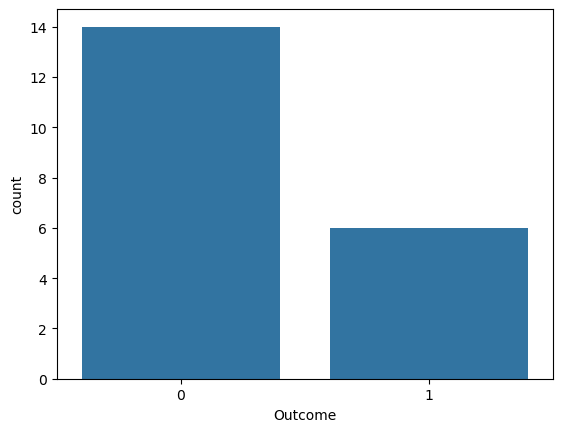

In [487]:
sns.countplot(x= 'Outcome', data = df)

In [499]:
from imblearn.over_sampling import SMOTE

#seprate feature X and Y 

x = df.drop('Outcome', axis= 1)
y = df['Outcome']



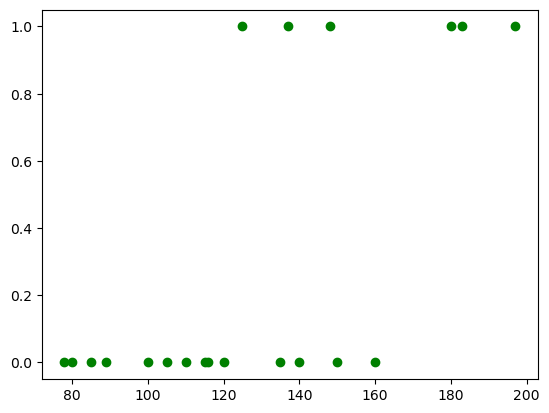

In [507]:
import matplotlib.pyplot as plt
plt.scatter(x['Glucose'],y, color= 'green')

In [533]:
#smote initilaizing

smote = SMOTE()

#apply smote

x_resampled , y_resampled = smote.fit_resample(x,y)




In [549]:
y_ = pd.DataFrame({'new_Outcomes': y_resampled })
y_.value_counts()



new_Outcomes
0               14
1               14
Name: count, dtype: int64

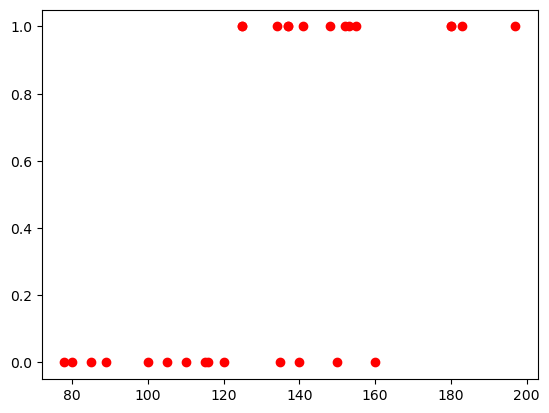

In [551]:
plt.scatter(x_resampled['Glucose'],y_, color= 'red')